### Analysis of Medical Cost Personal Datasets 

Cost-effectiveness analysis helps identify ways to save on Health Insurance Cost. It demonstrates not only the utility of allocating resources from ineffective to effective interventions, but also the utility of allocating resources from less to more cost-effective interventions. 

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# read dataset's path with pandas library function.
df_insurance = pd.read_csv('insurance.csv', index_col=0)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
Column1,,,,,,,
1,19.0,female,27.900,0.0,yes,southwest,16884.92400
2,18.0,male,33.770,1.0,no,southeast,1725.55230
3,28.0,male,33.000,3.0,no,southeast,4449.46200
4,33.0,male,22.705,0.0,no,northwest,21984.47061
5,32.0,male,28.880,0.0,no,northwest,3866.85520


In [30]:
# renaming columns
df_insurance.rename(columns=
                {'age':'Age',
                 'sex':'Sex',
                 'bmi':'BMI',
                 'children':'Children',
                 'smoker':'Smoker',
                 'region':'Region',
                 'charges':'Charges',
                 }, inplace=True)
df_insurance.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
Column1,,,,,,,
1,19.0,female,27.900,0.0,yes,southwest,16884.92400
2,18.0,male,33.770,1.0,no,southeast,1725.55230
3,28.0,male,33.000,3.0,no,southeast,4449.46200
4,33.0,male,22.705,0.0,no,northwest,21984.47061
5,32.0,male,28.880,0.0,no,northwest,3866.85520


In [31]:

df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   float64
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 449.8+ KB


In [32]:
# analysing insurance charges
df_insurance['Charges'].describe()


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: Charges, dtype: float64

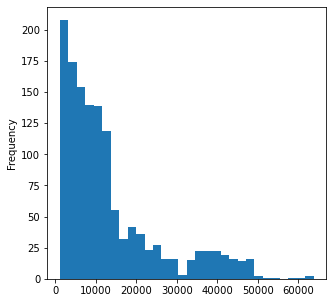

In [33]:
#histogram
df_insurance.Charges.plot(kind='hist', bins=30, figsize=(5,5))
plt.show()

In [34]:
# Sorting data by 'Charges'
top_charges = df_insurance.sort_values(by='Charges', ascending=False).head(10)
top_charges

,Age,Sex,BMI,Children,Smoker,Region,Charges
Column1,,,,,,,
617,54.0,female,47.410,0.0,yes,southeast,63770.42801
1508,45.0,male,30.360,0.0,yes,southeast,62592.87309
1432,52.0,male,34.485,3.0,yes,northwest,60021.39897
657,31.0,female,38.095,1.0,yes,northeast,58571.07448
932,33.0,female,35.530,0.0,yes,northwest,55135.40209
1336,60.0,male,32.800,0.0,yes,southwest,52590.82939
39,28.0,male,36.400,1.0,yes,southwest,51194.55914
1444,64.0,male,36.960,2.0,yes,southeast,49577.66240
1240,59.0,male,41.140,1.0,yes,southeast,48970.24760


##### What is the difference in cost between Males and Females?

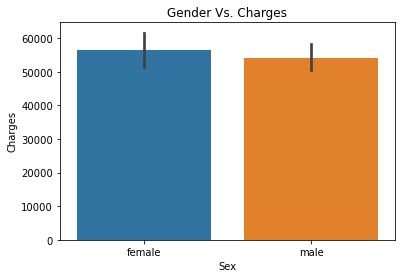

In [35]:
plt.title('Gender Vs. Charges')
sns.barplot(
    data = top_charges, 
    x = 'Sex',
    y = 'Charges')

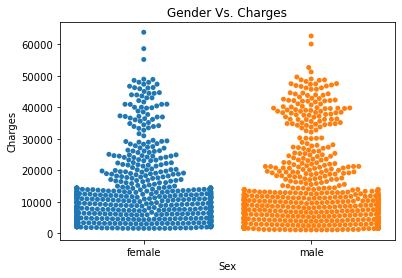

In [36]:
plt.title('Gender Vs. Charges')
sns.swarmplot(x = df_insurance['Sex'],y = df_insurance['Charges'])

We can conclude that gender does not increase insurance charges. Bar chart shows females pay slightly more than males, but if we analyze data from swarmplot, that diference is low.

#### Insurance charges based on number of children.

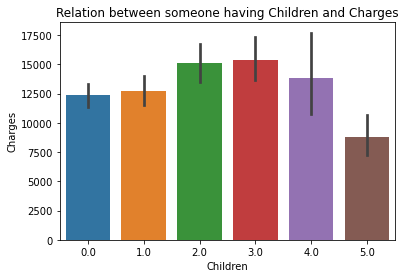

In [37]:
plt.title('Relation between someone having Children and Charges')
sns.barplot(x = df_insurance['Children'], y= df_insurance['Charges'])

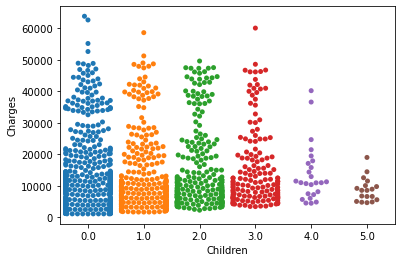

In [38]:
sns.swarmplot(x = df_insurance['Children'],y = df_insurance['Charges'])

In [39]:
children_count = df_insurance['Children'].value_counts()
children_count

0.0    574
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: Children, dtype: int64

We can conclude from barplot that number of children increase insurance cost. Insurance cost is higher for someone with 2 or 3 children, followed by 4 children, and none or 1, while a person with 5 children pays the least. However, scotterplot shows that persons with no children pay most.    

##### What is correlation between Age and Charges?

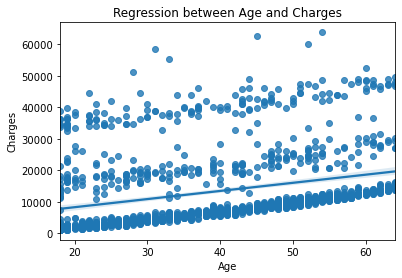

In [40]:
plt.title('Regression between Age and Charges')
sns.regplot(x=df_insurance['Age'],y=df_insurance['Charges'])
plt.show()

We can conclude that age inscreases insurance cost.

#### Does smoking increases insurance charges?

In [41]:
#counting number of smokers and nonsmokers 
smoker_count = df_insurance['Smoker'].value_counts()
smoker_count

no     1064
yes     274
Name: Smoker, dtype: int64

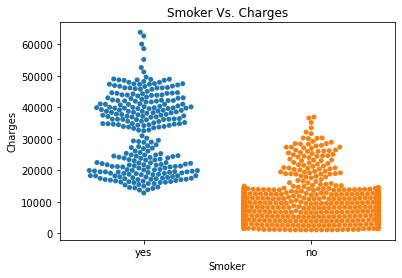

In [42]:
plt.title('Smoker Vs. Charges')
sns.swarmplot(x = df_insurance['Smoker'],y = df_insurance['Charges'])

We can conclude that smokers pay higher insurance preniums than nonsmokers.

#### Does BMI inscreases insurance cost for smokers?

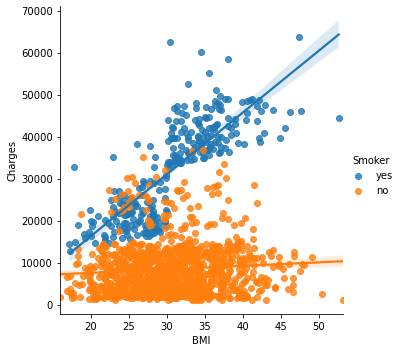

In [43]:
sns.lmplot(x = "BMI", y = "Charges", hue = "Smoker", data = df_insurance)

Based on regression lines we can conclude that for both smokers and nonsmokers higher BMI means higher insurance cost. However, smokers pay higher insurance charges than nonsmokers. 

#### Does region increases insurance costs?

In [44]:
region_count = df_insurance['Region'].value_counts()
region_count

southeast    364
northwest    325
southwest    325
northeast    324
Name: Region, dtype: int64

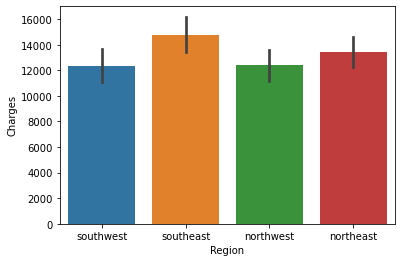

In [45]:
sns.barplot(x=df_insurance['Region'], y=df_insurance['Charges'])
plt.show()

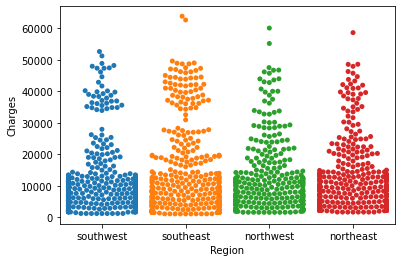

In [46]:
sns.swarmplot(x=df_insurance['Region'],y=df_insurance['Charges'])
plt.show()

According to both graphs, cost of insurance from The East region is higher than The west.

#### Conclusion
In conclusion, insurance cost increased based on age, followed by BMI, smooking, children and lastly region. 

- Database retreived from - https://www.kaggle.com/mirichoi0218/insurance